In [1]:
import model


Tensor("Placeholder:0", shape=(?, ?, ?, 3), dtype=float32)
Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_conv/3x3/rpn_conv/3x3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("lstm_o/Reshape:0", shape=(?, ?, ?, 128), dtype=float32)
Tensor("lstm_o/Reshape:0", shape=(?, ?, ?, 128), dtype=float32)
Tensor("rpn_cls_score/Reshape:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_cls_prob:0", shape=(?, ?, ?, ?), dtype=float32)
Tensor("Reshape_5:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_bbox_pred/Reshape:0", shape=(?, ?, ?, 40), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 3), dtype=float32)
INFO:tensorflow:Restoring parameters from /home/tutu/changhong/ocr/kerasocr/ctpn/checkpoints/model_final_tf13.ckpt


Using TensorFlow backend.
/home/tutu/anaconda2/envs/ocr/lib/python2.7/site-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [35]:
from glob import glob
from IPython.display import Image as display
import numpy as np
from PIL import Image
import time
paths = glob('./test/*.*')
paths

['./test/IMG_1563.JPG',
 './test/CgQgIlljJlyAF3fGAABk3TG5RM4164.jpg',
 './test/test.png',
 './test/3bef1970fd6e4601a292d7b272128512.jpeg',
 './test/4.jpg',
 './test/CgQgIll5TaGADkiiAAFhxGXefcA951.jpg']

## pytorch crnn

识别结果:

文具领取处
sstationerystorageplace
文具领取处
Stationerystorageplace


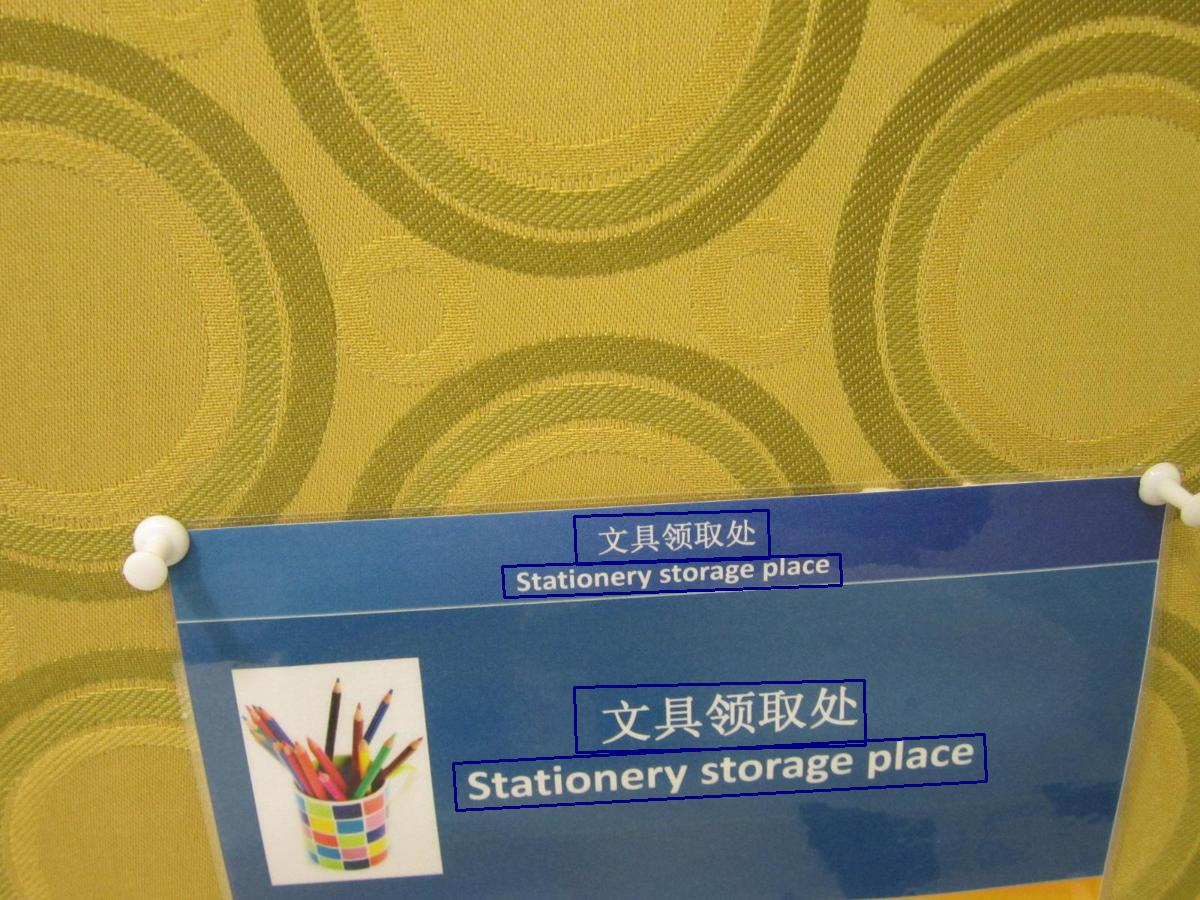

In [36]:
im = Image.open(paths[0])
img = np.array(im.convert('RGB'))
#t = time.time()
result,img = model.model(img,model='crnn') ## if model == crnn ,you should install pytorch
#print "It takes time:{}s".format(time.time()-t)
#print "---------------------------------------"
print "识别结果:\n"
Image.fromarray(img).save('/tmp/tmp.jpg')
for key in result:
    print result[key][1]
display('/tmp/tmp.jpg')

## keras crnn 

It takes time:2.29082083702s
---------------------------------------
回川省绵阳海豪冠磊窝逐用定或发票
四川绵阳市
息
妄税雾局咨努
.
发票代码45107165G00
发票号码00296313
 

。

:印j
意袁伺无
a __a
 加盖发票专用章有效 
发查询网灿:htn.//www.scI-tax.g0y.Cz


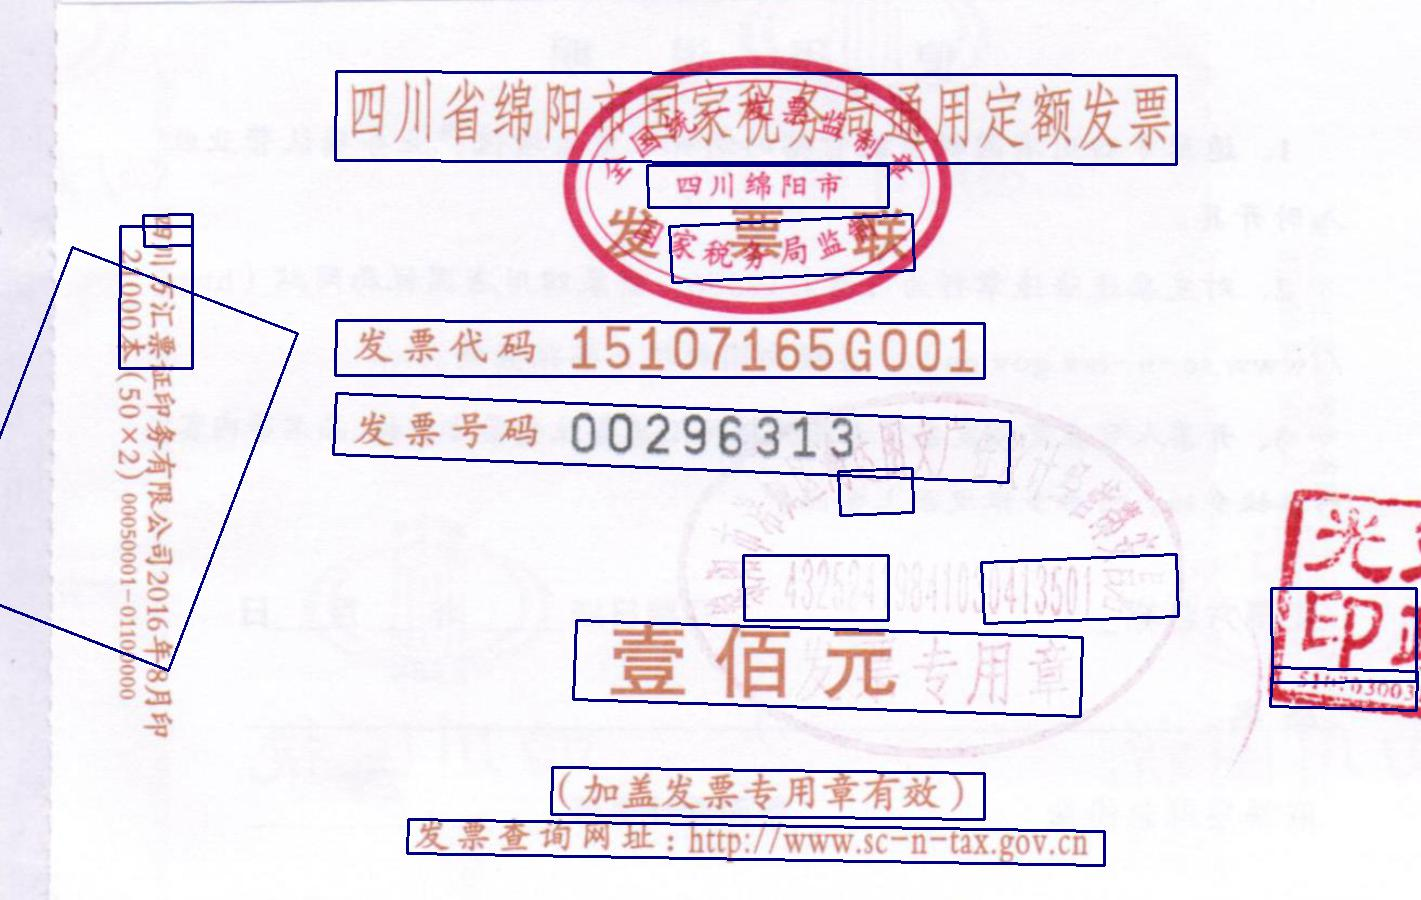

In [39]:
im = Image.open(paths[-1])
img = np.array(im.convert('RGB'))
t = time.time()
result,img = model.model(img,model='keras') ##if model == keras ,you should install keras
print "It takes time:{}s".format(time.time()-t)
print "---------------------------------------"
Image.fromarray(img).save('/tmp/tmp.jpg')
for key in result:
    print result[key][1]
display('/tmp/tmp.jpg')